<a href="https://colab.research.google.com/github/AdnanAli-10/Bike-Sharing-Demand-Prediction-Capstone-Project/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project_Syed_Adnan_S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


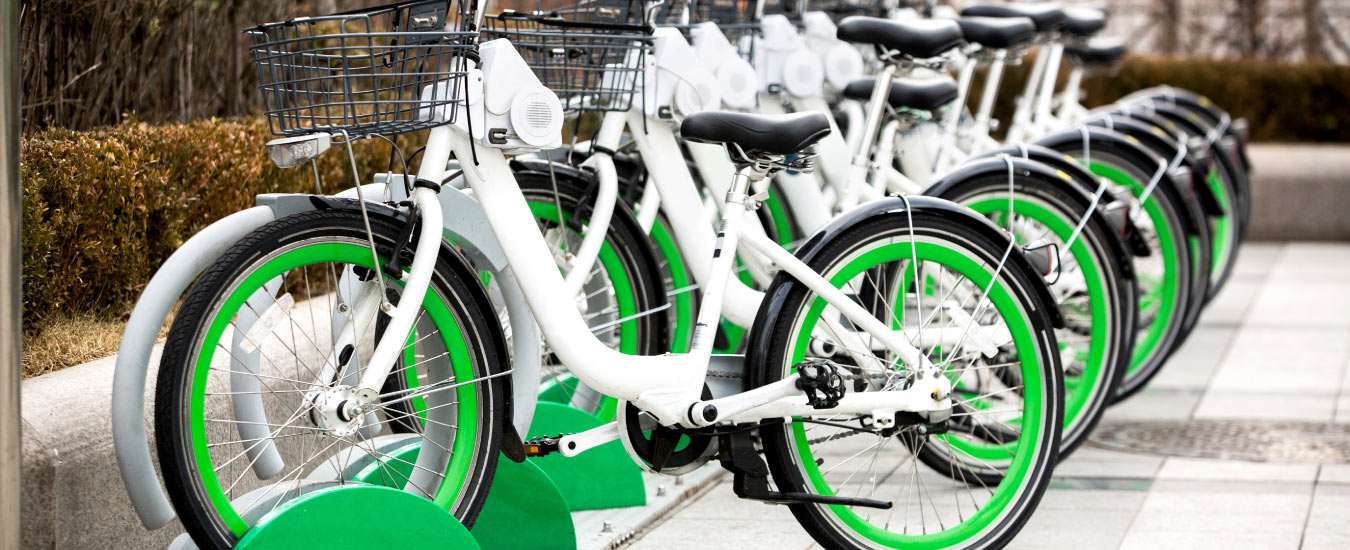

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

##<b>Project Flowchart:</b>
1. Initial preparations(Loading the dependencies and the data)

2. EDA

3. Clean-Up

4. Feature engineering

5. Pre processing of the data

6. Model implementation

7. Model explainability

## <b>1. Initial Preparations:</b>

In [257]:
#Importing the Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [259]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [324]:
#Loading the dataset
bike_sharing_df = pd.read_csv('/content/drive/MyDrive/Bike sharing demand prediction - Syed Adnan S /SeoulBikeData.csv',encoding='unicode_escape')

##<b>2. EDA:</b>

In [5]:
#First 5 observations
bike_sharing_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
#Last 5 observations
bike_sharing_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [7]:
#Shape of the dataset
bike_sharing_df.shape

(8760, 14)

We have 8,760 observations and 14 columns in our dataset.

In [8]:
#List of columns of the dataframe
bike_sharing_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

To understand what each column means we can read the data description given in the beginning.

In [9]:
#Statistical description of the dataframe
bike_sharing_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [10]:
#A concise summary of the dataframe
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [11]:
#Creating function to return all the unique values each categorical column can have
def cat_unique_vals(cat_cols,df):
  for col in cat_cols:
    print("The values that the categorical column",col,"can take are:",df[col].unique())

In [12]:
#Checking the possible values important and meaningful categorical columns can have.
categorical_columns=['Seasons','Holiday']
cat_unique_vals(categorical_columns,bike_sharing_df)

The values that the categorical column Seasons can take are: ['Winter' 'Spring' 'Summer' 'Autumn']
The values that the categorical column Holiday can take are: ['No Holiday' 'Holiday']


We'll perform further checks for the values that categorical columns can take.

In [13]:
#Creating a function that performs a groupby operation and returns a dataframe for analysis
def create_df_analysis(col):
  return bike_sharing_df.groupby(col)['Rented Bike Count'].sum().reset_index()

In [14]:
#Seasons column
seasons_col = create_df_analysis('Seasons')
seasons_col

,Seasons,Rented Bike Count
0,Autumn,1790002
1,Spring,1611909
2,Summer,2283234
3,Winter,487169


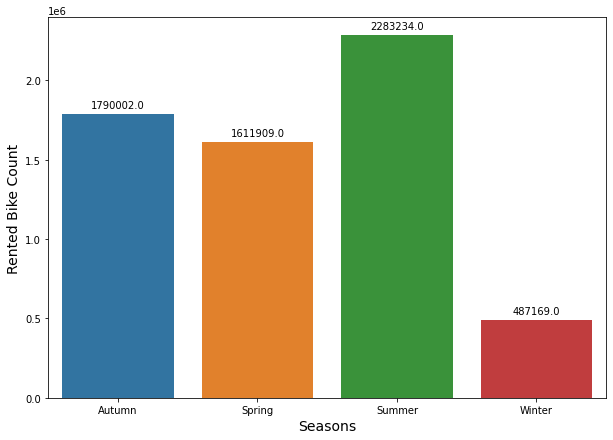

In [15]:
#Creating a visualisation for the seasons column
plt.figure(figsize=(10,7))
splot = sns.barplot(data=seasons_col,x='Seasons',y='Rented Bike Count')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Seasons", size=14)
plt.ylabel("Rented Bike Count", size=14)
plt.show()

In [16]:
#Initial preparations for plotting pie chart with percentages
seasons_list = list(seasons_col['Seasons']) 
rented_count_list = list(seasons_col['Rented Bike Count'])
palette_color = sns.color_palette('bright')
explode = (0.05,0.05,0.05,0.05)

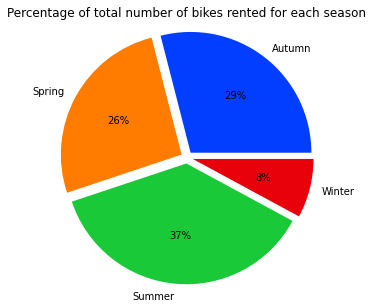

In [17]:
#Creating the pie chart visualisation for seasons column
plt.figure(figsize=(5,5))
plt.pie(rented_count_list,labels=seasons_list,colors=palette_color,explode=explode,autopct='%0.0f%%')
plt.title("Percentage of total number of bikes rented for each season")
plt.axis("equal")  
plt.show()

<b>As we can see that summer has the highest number of bikes rented, 37%. This could be because of the vacation mood created in summer and also the increase in the number of tourists. Winter however is the season where the least number of bikes are rented, 8%.</b>

In [18]:
#Holidays column
holidays_col = create_df_analysis('Holiday')
holidays_col

,Holiday,Rented Bike Count
0,Holiday,215895
1,No Holiday,5956419


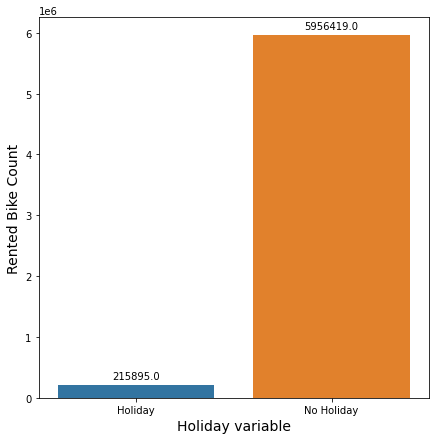

In [19]:
#Creating a visualisation for the holidays dataframe
plt.figure(figsize=(7,7))
splot = sns.barplot(data=holidays_col,x='Holiday',y='Rented Bike Count')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Holiday variable",size=14)
plt.ylabel("Rented Bike Count", size=14)
plt.show()

<b>As we can see that the majority of the bikes rented are on days which are considered as No Holiday.</b>

<b>Analysing for different temperatures.</b>

In [20]:
#Creating a visualisation to analyse the number of bikes rented for different temperatures
temp_bike = create_df_analysis('Temperature(°C)')
temp_bike

,Temperature(°C),Rented Bike Count
0,-17.8,322
1,-17.5,291
2,-17.4,64
3,-16.9,36
4,-16.5,96
...,...,...
541,38.0,1184
542,38.7,475
543,39.0,1033
544,39.3,531


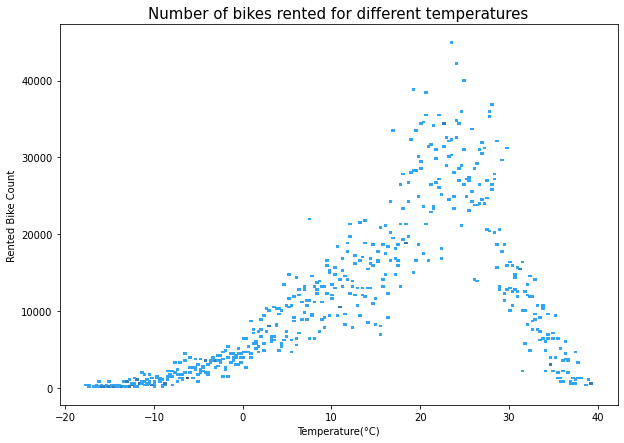

In [21]:
#Creating a visualisation for different temperatures
plt.figure(figsize=(10,7))
sns.histplot(data=temp_bike,x='Temperature(°C)',y='Rented Bike Count',bins=200)
plt.title('Number of bikes rented for different temperatures',size=15)
plt.show()

<b>As we can see that the most number of bikes rented are in the temperature range of 15 degrees to 30 degrees.</b>

<b>Analysing for different intensities of snowfall</b>

In [22]:
#Creating a dataframe to analyse the number of bikes rented for different intensities of snowfall
snowfall_bike = create_df_analysis('Snowfall (cm)')
snowfall_bike.head()

,Snowfall (cm),Rented Bike Count
0,0.0,6090314
1,0.1,205
2,0.2,3643
3,0.3,8304
4,0.4,5981


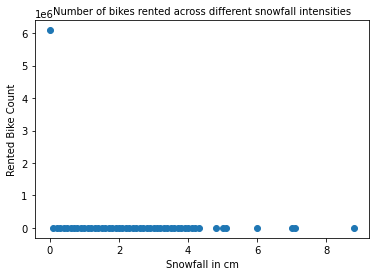

In [23]:
#Creating a visualisation for different snowfall intensities
plt.scatter(data=snowfall_bike,x='Snowfall (cm)',y='Rented Bike Count')
plt.title('Number of bikes rented across different snowfall intensities',size=10)
plt.xlabel('Snowfall in cm')
plt.ylabel('Rented Bike Count')
plt.show()

<b>Analysing for different intensities of rainfall</b>

In [24]:
#Creating a dataframe to analyse the number of bikes rented for different intensities of rainfall
rainfall_bike = create_df_analysis('Rainfall(mm)')
rainfall_bike.head()

,Rainfall(mm),Rented Bike Count
0,0.0,6086009
1,0.1,15179
2,0.2,3706
3,0.3,1401
4,0.4,2147


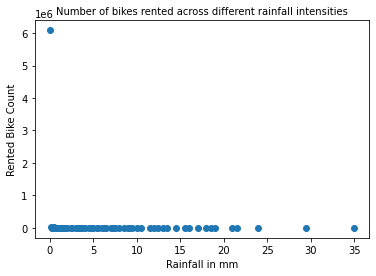

In [25]:
#Creating a visualisation for different rainfall intensities
plt.scatter(data=rainfall_bike,x='Rainfall(mm)',y='Rented Bike Count')
plt.title('Number of bikes rented across different rainfall intensities',size=10)
plt.xlabel('Rainfall in mm')
plt.ylabel('Rented Bike Count')
plt.show()

<b>We can see here that most of the bikes are rented when there is no snowfall at all. A similar result is seen for rainfall too, i.e the most number of bikes are rented when there is no rainfall.  

Note:The y axis in both the case is of the order 10 to the power 6, therefore the lower values are not too distinctive.</b>

<b>Analysing for different humidity percentages</b>

In [26]:
#Creating a dataframe for analysing the number of bikes rented for different humidity percentages. 
humidity_bike = create_df_analysis('Humidity(%)')
humidity_bike

,Humidity(%),Rented Bike Count
0,0,6930
1,10,1315
2,11,1986
3,12,2032
4,13,4353
...,...,...
85,94,13669
86,95,12146
87,96,18962
88,97,28730


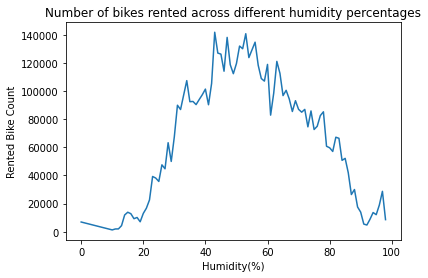

In [27]:
#Plotting a visualisation for the different humidity percentages
plt.plot(humidity_bike['Humidity(%)'],humidity_bike['Rented Bike Count'])
plt.xlabel('Humidity(%)')
plt.ylabel("Rented Bike Count")
plt.title("Number of bikes rented across different humidity percentages")
plt.show()

<b>As we can see that the majority of the bikes are rented for a humidity percentage range of 30 to 70.</b>

In [28]:
#Creating a dataframe to analyse the number of bikes rented for different hours of the day
hour_df = create_df_analysis("Hour")
hour_df

,Hour,Rented Bike Count
0,0,197633
1,1,155557
2,2,110095
3,3,74216
4,4,48396
5,5,50765
6,6,104961
7,7,221192
8,8,370731
9,9,235784


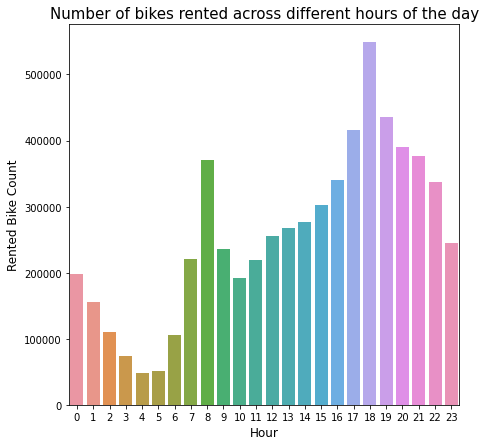

In [29]:
#Creating a visualisation for different hours of the day
plt.figure(figsize=(7,7))
sns.barplot(data=hour_df,x='Hour',y='Rented Bike Count')
plt.title('Number of bikes rented across different hours of the day',size=15)
plt.xlabel('Hour',size=12)
plt.ylabel('Rented Bike Count',size=12)
plt.show()

<b>Here we can see that the highest number of bike rentals have been done in the 18th hour, i.e 6pm, and lowest in the 4th hour, i.e 4am.</b>

In [30]:
#Creating a dataframe to analyse the number of bikes rented for different visibility rates
visibility_bike = create_df_analysis('Visibility (10m)')
visibility_bike

,Visibility (10m),Rented Bike Count
0,27,83
1,33,33
2,34,24
3,38,98
4,53,65
...,...,...
1784,1996,19547
1785,1997,18324
1786,1998,19518
1787,1999,18466


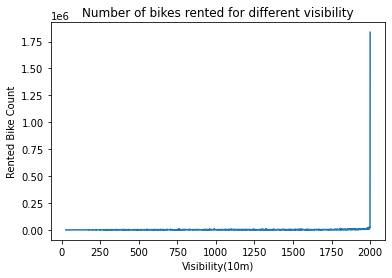

In [31]:
#Creating a visualisation for number of bikes rented in different visibility ranges
plt.plot(visibility_bike['Visibility (10m)'],visibility_bike['Rented Bike Count'])
plt.xlabel('Visibility(10m)')
plt.ylabel('Rented Bike Count')
plt.title('Number of bikes rented for different visibility')
plt.show()

We can see that higher visibility is preffered by the customers. Through further analysis of the visibility_bike dataframe we can see that for increasing visibility there is an increase in bikes rented. 

## <b>3. Clean Up:</b>

In [32]:
bike_sharing_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [33]:
#Checking the type of the column date
type(bike_sharing_df['Date'][0])

str

In [34]:
#Converting string to date time format
bike_sharing_df['Date'] = pd.to_datetime(bike_sharing_df['Date'])

### <b>Handling null values:</b>

Missing data is defined as the values or data that is not stored (or not present) for some variable/s in the given dataset.

Missing values can bias the results of the machine learning models and/or reduce the accuracy of the model. 

Therefore it is an essential practice to handle null values before training our model. There are two main ways of handling null values, one is to delete the observations containing null values and the other is to impute the null values with some meaning full values.

In [35]:
#Checking for null values
bike_sharing_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

<b>As we can see there are no null values present in our dataset and therefore we are good to go.</b> 

###<b>Handling duplicate values:</b>

When two features have the same set of values they are known as duplicate values.

Duplicate values can cause detrimental effect on our accuracy. Duplicate values can ruin the split between train,test and validation set, which ultimately leads to a biased performance estimates that disappoint the model in production.

The best way of dealing with duplicate values is to delete them.

In [36]:
#Checking for duplicate values
bike_sharing_df.duplicated().sum()

0

<b>As we can see there are no duplicate values, so we can move ahead.</b>

###<b>Removing outliers:</b>

Outliers are those data points that are significantly different from the rest of the data points in the dataset. These can cause the data to skew and affect the accuracy of the ML model. 

In [325]:
#Creating a list of columns that can possibly contain outliers
possible_outlier_cols = list(set(bike_sharing_df.describe().columns)-{'Rented Bike Count','Hour'})
possible_outlier_cols

['Temperature(°C)',
 'Rainfall(mm)',
 'Wind speed (m/s)',
 'Snowfall (cm)',
 'Solar Radiation (MJ/m2)',
 'Visibility (10m)',
 'Humidity(%)',
 'Dew point temperature(°C)']

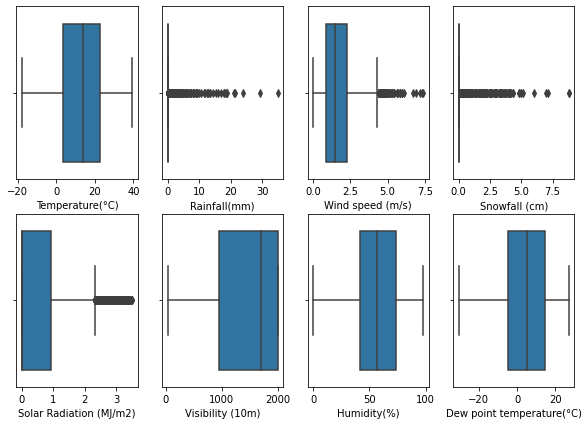

In [326]:
#Creating a boxplot to detect columns with outliers
plt.figure(figsize=(10,7))
for index,item in enumerate(possible_outlier_cols):
  plt.subplot(2,4,index+1)
  sns.boxplot(bike_sharing_df[item])

<b>Here we can see that the columns that contain outliers are Rainfall, Snowfall, Windspeed and Solar Radiation</b>

In [327]:
#Creating a list of columns that contains outliers
outlier_cols = ['Rainfall(mm)','Wind speed (m/s)','Snowfall (cm)','Solar Radiation (MJ/m2)']
outlier_cols

['Rainfall(mm)',
 'Wind speed (m/s)',
 'Snowfall (cm)',
 'Solar Radiation (MJ/m2)']

In [328]:
#Finding the inter-quartile range for the columns with outliers
Q1 = bike_sharing_df[outlier_cols].quantile(0.25)
Q3 = bike_sharing_df[outlier_cols].quantile(0.75)
IQR = Q3-Q1
IQR

Rainfall(mm)               0.00
Wind speed (m/s)           1.40
Snowfall (cm)              0.00
Solar Radiation (MJ/m2)    0.93
dtype: float64

In [329]:
#Calculating the upper and lower fence for outlier removal
u_fence = Q3 + (1.5*IQR)
l_fence = Q1 - (1.5*IQR)

In [330]:
#Detecting and removing the outliers
bike_sharing_df[outlier_cols] = bike_sharing_df[outlier_cols][~((bike_sharing_df[outlier_cols] < l_fence) | (bike_sharing_df[outlier_cols] > u_fence))]

In [331]:
#Checking the number of outliers deleted
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8599 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8119 non-null   float64
 9   Rainfall(mm)               8232 non-null   float64
 10  Snowfall (cm)              8317 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

<b>Due to outlier deletion, some null values have been created in these 4 columns.Now, we can either delete the observations with null values or impute them with some meaning full values. In this case I will be imputing them with the median value of each column.

Note: Usually mean is chosen to impute null values, but I'll be choosing the median because mean is affected very much by outliers whereas the median is not.</b>

In [332]:
#Creating a function to impute the null values created by outlier handling.
def impute_null(outlier_cols):
  for col in outlier_cols:
    bike_sharing_df[col].fillna(bike_sharing_df[col].median(),inplace=True)

In [333]:
#Calling the imputing function
impute_null(outlier_cols)

In [334]:
#Checking if the imputation is successful
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

<b>The imputation is successful and therefore we have handled the outliers successfully</b>

## <b>4.Feature Engineering:</b>

### <b>Feature encoding:</b>
Machine learning models can only work with numerical values and therefore important categorical columns have to converted/encoded into numerical variables. This process is known as <b>Feature Encoding</b>

Here we have three columns that require encoding and they are Seasons, Holiday and Functioning Day. 

In [335]:
#Encoding for Seasons column
bike_sharing_df['Winter'] = np.where(bike_sharing_df['Seasons']=='Winter', 1, 0)
bike_sharing_df['Spring'] = np.where(bike_sharing_df['Seasons']=='Spring', 1, 0)
bike_sharing_df['Summer'] = np.where(bike_sharing_df['Seasons']=='Summer', 1, 0)
bike_sharing_df['Autumn'] = np.where(bike_sharing_df['Seasons']=='Autumn', 1, 0)

#Removing seasons column since we dont require it now.
bike_sharing_df.drop(columns=['Seasons'],axis=1,inplace=True)

In [336]:
#Encoding for Holiday column
bike_sharing_df['Holiday'] = np.where(bike_sharing_df['Holiday']=='Holiday',1,0)

In [337]:
#Encoding for Functioning day
bike_sharing_df['Functioning Day'] = np.where(bike_sharing_df['Functioning Day']=='Yes',1,0)

In [338]:
#Look of the dataframe after encoding all three columns
bike_sharing_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Winter,Spring,Summer,Autumn
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,1,0,0,0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,1,0,0,0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,1,0,0,0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,1,0,0,0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,1,0,0,0


###<b>Checking correlation for feature removal:</b>

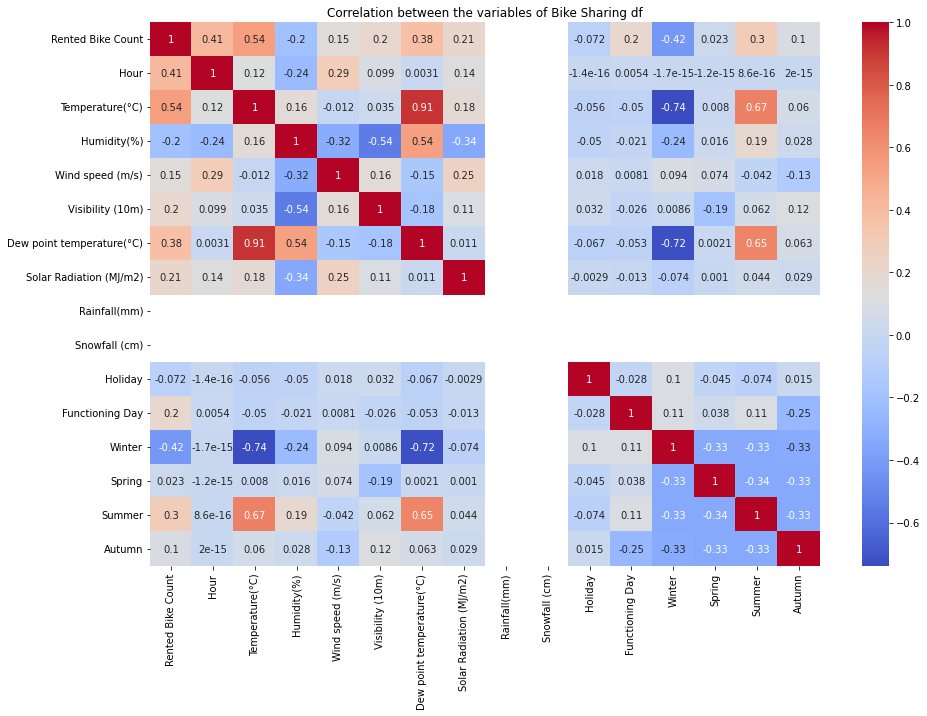

In [339]:
#Plotting correlation matrix using sns.heatmap
corr_matrix = bike_sharing_df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation between the variables of Bike Sharing df')
plt.show()

<b>The Dew point temperature column is highly correlated to the Temperature column and therefore we can remove it and it most likely won't affect our model building much, so we will drop the dew point temperature column.

I will also remove the date column because I don't think it adds any value.</b>

In [340]:
#Dropping unnecessary columns
bike_sharing_df.drop(columns={'Dew point temperature(°C)','Date'},axis=1,inplace=True)

In [341]:
bike_sharing_df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'Functioning Day', 'Winter',
       'Spring', 'Summer', 'Autumn'],
      dtype='object')

### <b>Removing Multicollinearity:</b>
Multicollinearity is when two independent variables are highly correlated to each other.

Multicollinearity affects the accuracy of the regression models, and therefore we will check if we have multicollinearity in our dataset and solve it by removing columns which cause multicollinearity.

<b>Note:</b> I will check the multicollinearity of our dataset by using the variance inflation factor. Accepted VIF is less than 10.

In [342]:
#Creating a list of independent columns
idv_cols = list(set(bike_sharing_df.columns)-{'Rented Bike Count'})

In [343]:
#Creating a function to calculate the variance inflation factor(VIF)
def calc_vif(X):
    vif = pd.DataFrame()
    vif["Columns"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [344]:
#Calculating the VIF for independent columns
calc_vif(bike_sharing_df[idv_cols])

,Columns,VIF
0,Temperature(°C),4.443786
1,Rainfall(mm),NaN
2,Wind speed (m/s),1.234386
3,Hour,1.180808
4,Solar Radiation (MJ/m2),1.270845
5,Snowfall (cm),NaN
6,Functioning Day,1.079354
7,Visibility (10m),1.629212
8,Humidity(%),2.042755
9,Spring,23.455815


We can see that the seasons encoding have very high VIF therefore we will eliminate one of the columns. We will drop winter because it has the lowest bikes rented. The columns Rainfall and Snowfall have no VIF at all so we will drop them too.

In [345]:
#Dropping the Unnecessary columns
bike_sharing_df.drop(columns={'Winter','Rainfall(mm)','Snowfall (cm)'},axis=1,inplace=True)

In [346]:
#Creating a list of remaining independent columns 
idv_cols = list(set(bike_sharing_df.columns)-{'Rented Bike Count'})

In [347]:
#Calculating VIF for remaining independent columns
calc_vif(bike_sharing_df[idv_cols])

,Columns,VIF
0,Temperature(°C),9.607644
1,Wind speed (m/s),4.834994
2,Hour,4.226978
3,Solar Radiation (MJ/m2),1.652737
4,Functioning Day,18.833311
5,Visibility (10m),7.345935
6,Humidity(%),10.462240
7,Spring,3.976104
8,Autumn,4.448885
9,Holiday,1.071381


We can see that Functioning Day has a VIF>10 therefore we will remove it.

In [348]:
#Dropping the Functioning Day column 
bike_sharing_df.drop(columns={'Functioning Day'},axis=1,inplace=True)

In [349]:
#Creating a list with remaining independent columns
idv_cols = list(set(bike_sharing_df.columns)-{'Rented Bike Count'})

In [350]:
#Calculating the VIF for remaining independent columns
calc_vif(bike_sharing_df[idv_cols])

,Columns,VIF
0,Temperature(°C),9.481974
1,Wind speed (m/s),4.707847
2,Hour,4.025525
3,Solar Radiation (MJ/m2),1.598384
4,Visibility (10m),5.216380
5,Humidity(%),5.401113
6,Spring,3.927898
7,Autumn,4.437701
8,Holiday,1.070809
9,Summer,9.167621


<b>Now that we don't have any variable with VIF>10 we can move ahead.</b>

### <b>Obtaining correlation between independent and dependent variables:</b>
We will use a regression plot to find this correlation. This also finds if the independent variable has a linear relationship with the dependent variable, which is an assumption that has to be satisfied for models like linear regression.

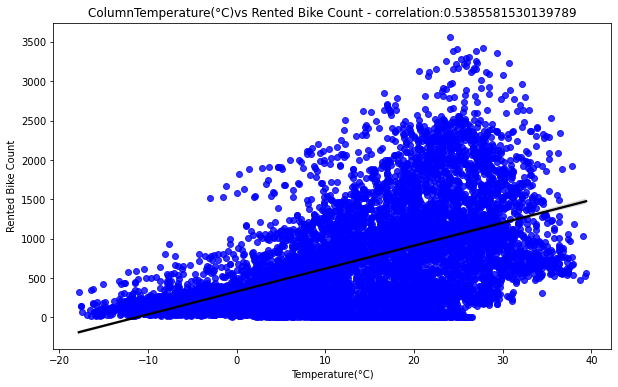

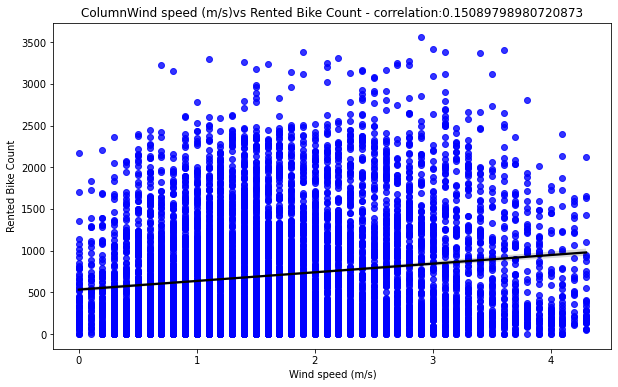

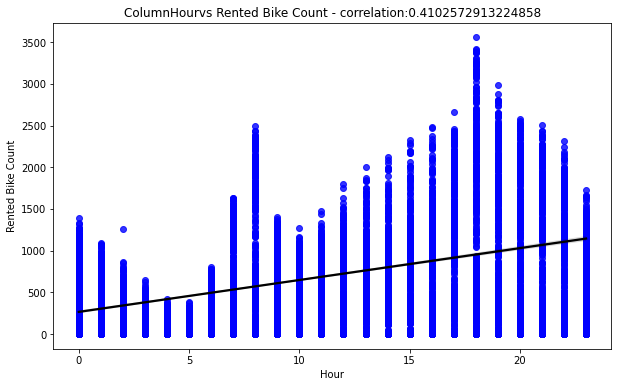

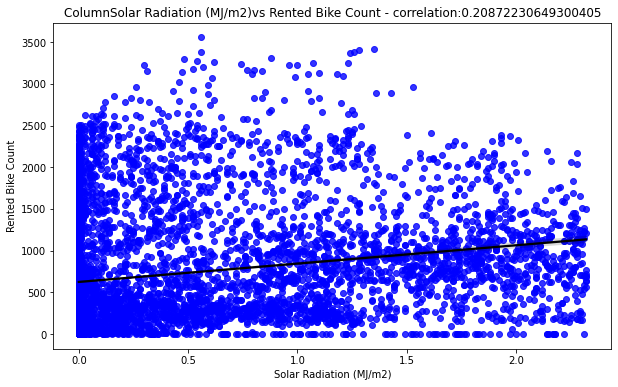

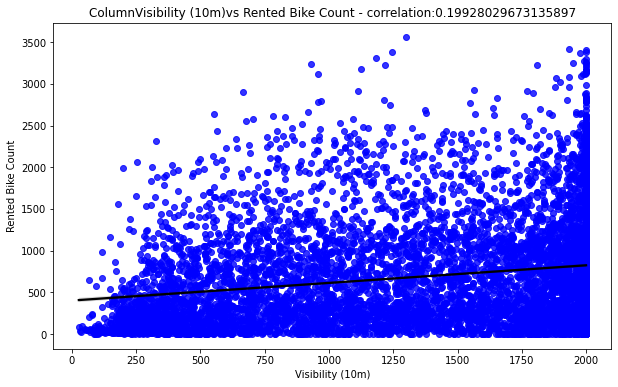

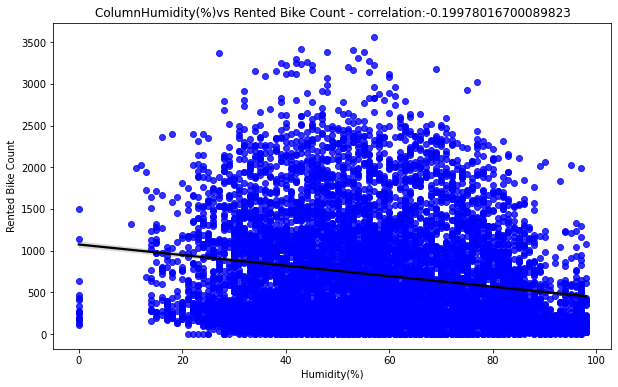

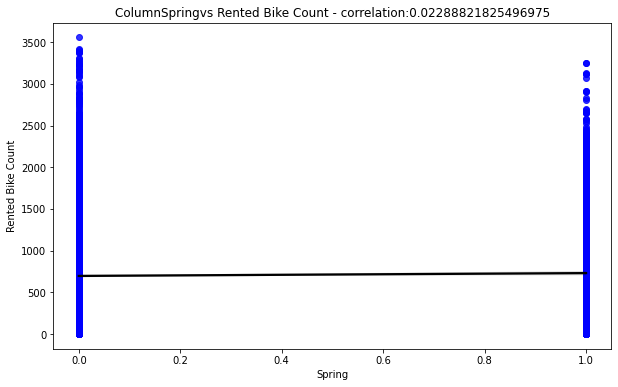

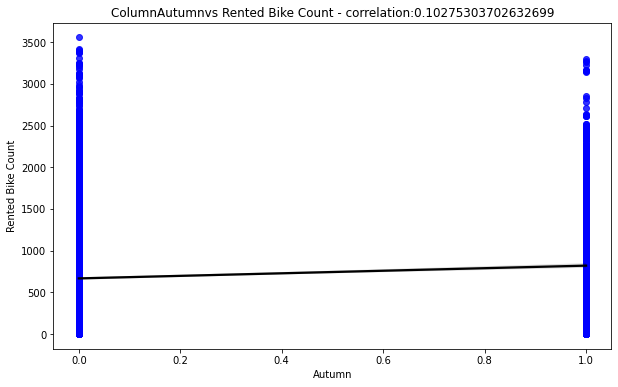

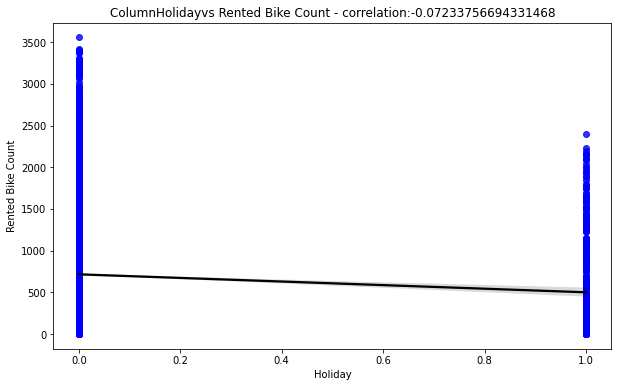

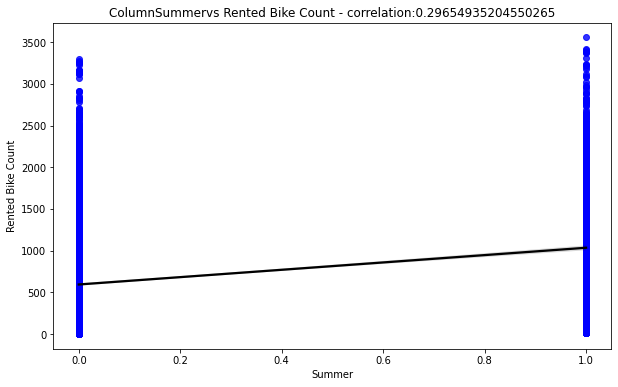

In [351]:
#printing the regression plot for all the numerical features
for col in idv_cols:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=bike_sharing_df[col],y=bike_sharing_df['Rented Bike Count'],scatter_kws={"color": 'blue'}, line_kws={"color": "black"})
  corr=bike_sharing_df[col].corr(bike_sharing_df['Rented Bike Count'])
  ax.set_title('Column'+ col+'vs Rented Bike Count - correlation:'+str(corr))

<b>We can see that all the remaining columns that we have, have a linear relationship with the dependent variable. So we have satisfied the assumption and therefore we are good to go.</b>

## <b>5. Pre processing of the data:</b>